#### Qiskit Version Table

In [1]:
import qiskit.tools.jupyter
%qiskit_version_table

In [2]:
from qiskit import QuantumCircuit, execute
from qiskit import Aer
import numpy as np

## VQE: A Simple Example 

Suppose we want to find the minimal eigenvalue of given Hamiltonian 

## <center>  $H=\begin{pmatrix}1 & 0 \\ 0 &-1  \end{pmatrix}$ <center> 

Remerber we need to follow the three step: 
### * 1. Ansatz Construction (State Preparation)
### * 2. Measure Expectation Value
### * 3. Optimization

### Step 1: Ansatz Construction

Review of Rotation gate

#### Rotation around Y-axis

#### <center> $R_y(\theta)=\begin{pmatrix}\cos(\theta/2) & - \sin(\theta/2)\\\sin(\theta/2) & \cos(\theta/2).\end{pmatrix} =u3(\theta,0,0)$

In [3]:
def vqe_ansatz_1(theta):
    # Create Quantum Circuit
    ansatz=QuantumCircuit(1,1)
    
    # Apply Ry gate
    ansatz.ry(theta,0)
    
    # Return Quantum Circuit
    return ansatz

After do that, the trial wave function (ansatz) becomes:

### <center> $ | \psi (\theta) \rangle=R_y(\theta) | \psi_0 \rangle = \begin{bmatrix}\cos(\theta/2)\\ \sin(\theta/2)\end{bmatrix}$

### Step 2 : Measure Expectation Value

For Given Hamiltonian, 
the expectation value of $ \langle \psi (\theta)  | H | \psi (\theta)  \rangle =\langle \psi (\theta)  | Z | \psi (\theta)  \rangle$

### $\langle Z  \rangle=\begin{bmatrix}\cos(\frac{\theta}{2}) & \sin(\frac{\theta}{2})\end{bmatrix}\begin{bmatrix}1 & 0\\ 0 & -1\end{bmatrix}\begin{bmatrix}\cos(\theta/2)\\ \sin(\theta/2)\end{bmatrix} =\cos^2(\frac{\theta}{2})-\sin^2(\frac{\theta}{2})$

In [4]:
### Select simulator
QC_simulator = Aer.get_backend('qasm_simulator')

# Define number of measurments shots
sample_shots=1000

def expval(paras):
    
    # call ansatz 
    vqe=vqe_ansatz_1(paras)
    
    # measure in Z-basis
    vqe.measure([0],[0])
    
    # Compile and execute
    job_qasm = execute(vqe, QC_simulator,shots=sample_shots)
    result_sim = job_qasm.result().get_counts()    

    # Calculate expectation
    P_0=result_sim.get('0',0)/sample_shots
    P_1=result_sim.get('1',0)/sample_shots
    vqe_ans=P_0-P_1
    
    return vqe_ans

### Step 3 : Oprimization

Due to the variational principle, we have

$$E(\boldsymbol\theta)\equiv  \langle H \rangle = \langle \psi(\boldsymbol\theta)| H |\psi(\boldsymbol\theta)\rangle \ge E_0 = \langle \psi_0 | H | \psi_0 \rangle,$$ 

Since in this case, we have only one parameter $\theta$, we can calculate the expectation value for $\theta \in [0,2\pi]$ to find the lowest eigenvalue

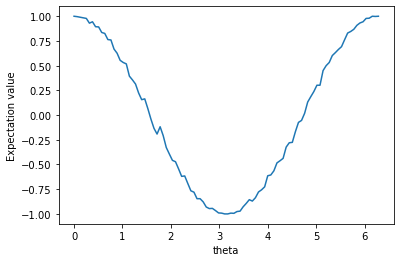

In [5]:
theta_range = np.linspace(0.0, 2 * np.pi, 100)
vqe_result=[expval(params) for params in theta_range]

import matplotlib.pyplot as plt
plt.xlabel('theta')
plt.ylabel('Expectation value')
plt.plot(theta_range, vqe_result)
plt.show()

#### Great! We find the lowest eigenvalue!

In [6]:
print("The lowest eigenvalue: {0} \t corresponding parameters: {1}".format(min(vqe_result),theta_range[vqe_result.index(min(vqe_result))]))

The lowest eigenvalue: -1.0 	 corresponding parameters: 3.1098593944626236


#### Oprimizer Approach 

In [7]:
from scipy.optimize import minimize
initial_guess=[0]

ans=minimize(expval,initial_guess,method='COBYLA')
ans

     fun: -0.998
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 15
  status: 1
 success: True
       x: array([3.1251])